In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import os

In [3]:
def restructure_data(data):
    # Restructure the data to create a merged table where each column correspond to a neuron or a experimental variable and each row correspond to a time point.
    data_group = data.groupby('Cell')
    template_df = None
    for k in data_group.groups.keys():
        if template_df is None:
            template_df = data_group.get_group(k)
            template_df = template_df.drop(columns=['F', 'Cell'])
        cell_id = int(''.join(filter(str.isdigit, k)))
        template_df[cell_id] = data_group.get_group(k)['F'].values
    return template_df

# Function to extract firing rates and calculate mean or Z-score
import pandas as pd
import numpy as np
def batch_load(fn_list):
    """
    Load the data from a list of file names and restructure the data
    :param fn_list:  list of the full path of the file names
    :param food_coord:  the coordinate of the food
    :return:  data_list: list of restructured data
    """
    data_list = []
    for fn in fn_list:
        data = pd.read_csv(f'{fn}')
        data = restructure_data(data)
        data_list.append(data)
    return data_list

In [38]:
data_dir = r'C:/Users/ding/Documents/WenyuAnalysis/WenyuAnalysis/data/final'   # your data directory
file_list = ['1925_water_pointevent_291124.csv','1891_water_pointevent_291124.csv','1866_water_pointevent_291124.csv','3141_water_pointevent_201124.csv','2099_water_pointevent_201124.csv','2021_water_pointevent_201124.csv','3152_water_pointevent_201124.csv','2015_water_pointevent_111124.csv','2107_water_pointevent_111124.csv','2023_water_pointevent_111124.csv','3118_water_pointevent_111124.csv','2097_water_pointevent_111124.csv',
             '2097_chocolate_061224.csv','1925_chocolate_pointevent_291124.csv','1891_chocolate_pointevent_291124.csv','1866_chocolate_pointevent_291124.csv','3141_chocolate_pointevent_201124.csv','2021_chocolate_pointevent_201124.csv','3118_chocolate_pointevent_201124.csv','2099_chocolate_pointevent_111124.csv','2107_chocolate_pointevent_111124.csv','2015_chocolate_pointevent_111124.csv','3152_chocolate_pointevent_111124.csv','2023_chocolate_pointevent_201124.csv',
             '1925_strawberry_pointevent_291124.csv','1891_strawberry_pointevent_291124.csv','1866_strawberry_pointevent_291124.csv','3141_strawberry_pointevent_201124.csv','2099_strawberry_pointevent_111124.csv','2097_strawberry_pointevent_111124.csv','3118_strawberry_pointevent_111124.csv','2023_strawberry_pointevent_111124.csv','2107_strawberry_pointevent_111124.csv','2021_strawberry_pointevent_111124.csv','3152_strawberry_pointevent_111124.csv','2015_strawberry_pointevent_201124.csv',
             '1925_vanilla_pointevent_291124.csv','1891_vanilla_pointevent_291124.csv','1866_vanilla_pointevent_291124.csv','3141_vanilla_pointevent_201124.csv','2015_vanilla_pointevent_111124.csv','3152_vanilla_pointevent_201124.csv','2021_vanilla_pointevent_111124.csv','2107_vanilla_pointevent_111124.csv','2099_vanilla_pointevent_111124.csv','2023_vanilla_pointevent_111124.csv','3118_vanilla_pointevent_111124.csv','2097_vanilla_pointevent_111124.csv',
             '2097_quinine_061224.csv','1925_quinine_pointevent_291124.csv','1891_quinine_pointevent_291124.csv','1866_quinine_pointevent_291124.csv','3141_quinine_pointevent_201124.csv','2015_quinine_pointevent_201124.csv','3152_quinine_pointevent_201124.csv','2107_quinine_pointevent_111124.csv','2099_quinine_pointevent_111124.csv','2023_quinine_pointevent_111124.csv','3118_quinine_pointevent_111124.csv','2021_quinine_pointevent_111124.csv']  # list of file names

In [39]:
import os
import pandas as pd

# Function to restructure a single data file
def restructure_data(data):
    """
    Restructure the data to create a merged table where each column corresponds to a neuron 
    or an experimental variable and each row corresponds to a time point.
    """
    data_group = data.groupby('Cell')
    template_df = None
    for k in data_group.groups.keys():
        if template_df is None:
            template_df = data_group.get_group(k)
            template_df = template_df.drop(columns=['F', 'Cell'])
        cell_id = int(''.join(filter(str.isdigit, k)))
        template_df[cell_id] = data_group.get_group(k)['F'].values
    return template_df

# Function to batch-load and process files
def process_files(data_dir, file_list):
    """
    Batch load and process files to add mouse number and condition.
    """
    processed_data = []

    for file_name in file_list:
        file_path = os.path.join(data_dir, file_name)
        
        # Extract mouse number and condition from file name
        parts = file_name.split('_')
        mouse_number = parts[0]
        condition = parts[1]
        
        # Load the file
        data = pd.read_csv(file_path)
        
        # Restructure the data
        restructured_data = restructure_data(data)
        
        # Add mouse number and condition as columns
        restructured_data['Mouse'] = mouse_number
        restructured_data['Condition'] = condition
        
        # Append to the list
        processed_data.append(restructured_data)
    
    # Concatenate all processed data into a single DataFrame
    merged_data = pd.concat(processed_data, ignore_index=True)
    return merged_data

# Define directory and file list


# Process files and create the merged DataFrame
merged_data = process_files(data_dir, file_list)

# Save the merged data to a new CSV file (optional)
output_path = os.path.join(data_dir, 'merged_restructured_data.csv')
merged_data.to_csv(output_path, index=False)

print("Data restructuring and merging completed!")


Data restructuring and merging completed!


In [49]:
merged_data

,Time,lick,lickpoint,licking,0,1,3,4,5,6,...,193,106,143,161,163,165,167,175,178,181
0,0.099918,0.0,0.0,NaN,0.00000,0.0,0.000000,0.000000,0.0,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.199836,0.0,0.0,NaN,0.00000,0.0,0.000000,0.000000,0.0,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.299754,0.0,0.0,NaN,0.00000,0.0,0.000000,0.000000,0.0,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.399672,0.0,0.0,NaN,0.00000,0.0,0.000000,0.000000,0.0,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.499590,0.0,0.0,NaN,0.00000,0.0,0.000000,0.000000,0.0,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188094,305.655552,NaN,0.0,0.0,14.29785,NaN,9.381762,4.842372,NaN,15.09951,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188095,305.755472,NaN,0.0,0.0,13.90665,NaN,11.621830,5.980959,NaN,14.14603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188096,305.855392,NaN,0.0,0.0,13.22953,NaN,11.806390,4.731668,NaN,12.83552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188097,305.955312,NaN,0.0,0.0,13.95370,NaN,12.679190,6.188100,NaN,12.91158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_dir = r'C:/Users/ding/Documents/WenyuAnalysis/WenyuAnalysis/data/final'   # your data directory
file_list = ['3141_spoogy_pointevent_201124.csv','2015_spoogy_pointevent_201124.csv','2023_spoogy_pointevent_201124.csv','2107_spoogy_pointevent_201124.csv','1891_spoogy_pointevent_111124.csv','1866_spoogy_pointevent_111124.csv','3152_spoogy_pointevent_111124.csv','2097_spoogy_pointevent_111124.csv','2021_spoogy_pointevent_111124.csv','2099_spoogy_pointevent_111124.csv','3118_spoogy_pointevent_111124.csv']  # list of file names

In [20]:
data_dir = r'C:/Users/ding/Documents/WenyuAnalysis/WenyuAnalysis/data/final'   # your data directory
file_list = ['3141_softwood_pointevent_201124.csv','1891_softwood_pointevent_201124.csv','2023_softwood_pointevent_201124.csv','2107_softwood_pointevent_201124.csv','3118_softwood_pointevent_201124.csv','2097_softwood_pointevent_201124.csv','3152_softwood_pointevent_201124.csv','2015_softwood_pointevent_111124.csv','2021_softwood_pointevent_111124.csv','2099_softwood_pointevent_111124.csv']  # list of file names

In [15]:
data_dir = r'C:/Users/ding/Documents/WenyuAnalysis/WenyuAnalysis/data/final'   # your data directory
file_list = ['3141_styrofoam_061224.csv','2015_styrofoam_pointevent_201124.csv','2107_styrofoam_pointevent_201124.csv','2097_styrofoam_pointevent_201124.csv','3152_styrofoam_pointevent_201124.csv','3118_styrofoam_pointevent_111124.csv','2023_styrofoam_pointevent_111124.csv','2099_styrofoam_pointevent_111124.csv','2021_styrofoam_pointevent_111124.csv','1891_styrofoam_bitepoint.csv']  # list of file names

In [21]:
data_list = batch_load([f'{data_dir}/{fn}' for fn in file_list])

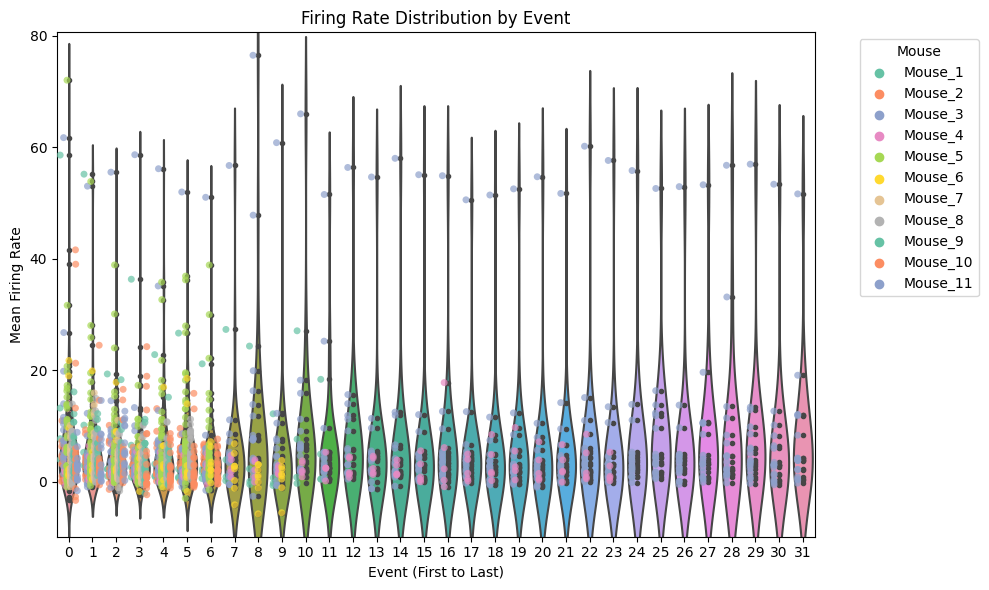

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to extract event data and calculate mean
def extract_event_data_and_mean(df, event_column='bitepoint', pre_event_time=30, post_event_time=30):
    # Find all event indices
    event_indices = df[df[event_column] == 1].index
    
    # Initialize a list to store results for each event
    mean_firing_rates_per_event = []
    
    for event_index in event_indices:
        # Define the time window around the event
        start_time = event_index - pre_event_time
        end_time = event_index + post_event_time
        
        # Ensure the window is within bounds
        if start_time < 0 or end_time >= len(df):
            continue
        
        # Extract neuron columns (assuming neuron columns are numeric indices)
        neuron_columns = [col for col in df.columns if isinstance(col, int)]
        
        # Extract the event data
        event_data = df.loc[start_time:end_time, neuron_columns]
        
        # Calculate the mean firing rate for each neuron during the post-event time window
        mean_firing_rates = event_data.loc[event_index:event_index + post_event_time].mean()
        
        # Append mean firing rates for this event
        mean_firing_rates_per_event.append(mean_firing_rates)
    
    # Combine all events into a single DataFrame
    return pd.DataFrame(mean_firing_rates_per_event)

# Loop through each dataframe, extract event data, and calculate the means
filtered_neuron_data = []
for i, df in enumerate(data_list):
    mean_firing_rates = extract_event_data_and_mean(df)
    
    # Filter neurons with mean firing rates > 0.3
    included_neurons = mean_firing_rates.loc[:, mean_firing_rates.mean() > 0.3]
    
    # Prepare data for the violin plot
    for event_no, row in included_neurons.iterrows():
        for neuron, firing_rate in row.items():
            filtered_neuron_data.append({
                'Mouse': f'Mouse_{i + 1}',
                'Event': event_no,
                'Firing Rate': firing_rate
            })

# Convert the data to a DataFrame
filtered_neuron_df = pd.DataFrame(filtered_neuron_data)

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_neuron_df, x='Event', y='Firing Rate', scale='width', inner='point')
sns.stripplot(data=filtered_neuron_df, x='Event', y='Firing Rate', hue='Mouse', dodge=True, jitter=True, palette='Set2', alpha=0.7)

plt.title('Firing Rate Distribution by Event')
plt.xlabel('Event (First to Last)')
plt.ylabel('Mean Firing Rate')
plt.legend(title='Mouse', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


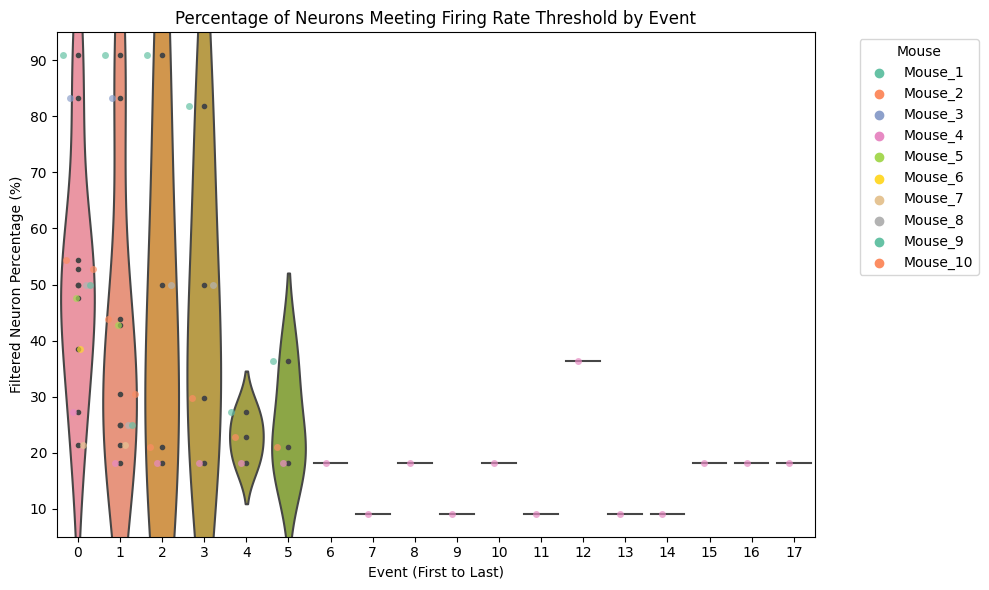

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to extract event data and calculate mean
def extract_event_data_and_mean(df, event_column='bitepoint', pre_event_time=30, post_event_time=30):
    # Find all event indices
    event_indices = df[df[event_column] == 1].index
    
    # Initialize a list to store results for each event
    mean_firing_rates_per_event = []
    
    for event_index in event_indices:
        # Define the time window around the event
        start_time = event_index - pre_event_time
        end_time = event_index + post_event_time
        
        # Ensure the window is within bounds
        if start_time < 0 or end_time >= len(df):
            continue
        
        # Extract neuron columns (assuming neuron columns are numeric indices)
        neuron_columns = [col for col in df.columns if isinstance(col, int)]
        
        # Extract the event data
        event_data = df.loc[start_time:end_time, neuron_columns]
        
        # Calculate the mean firing rate for each neuron during the post-event time window
        mean_firing_rates = event_data.loc[event_index:event_index + post_event_time].mean()
        
        # Append mean firing rates for this event
        mean_firing_rates_per_event.append(mean_firing_rates)
    
    # Combine all events into a single DataFrame
    return pd.DataFrame(mean_firing_rates_per_event)

# Loop through each dataframe, extract event data, and calculate the percentages
filtered_percentage_data = []
for i, df in enumerate(data_list):
    mean_firing_rates = extract_event_data_and_mean(df)
    
    # Total number of neurons for this mouse
    total_neurons = len(mean_firing_rates.columns)
    
    for event_no, row in mean_firing_rates.iterrows():
        # Calculate the percentage of neurons with mean firing rates > 0.3
        filtered_neurons = row[row > 5]
        percentage = len(filtered_neurons) / total_neurons * 100
        
        # Append data for the plot
        filtered_percentage_data.append({
            'Mouse': f'Mouse_{i + 1}',
            'Event': event_no,
            'Filtered Percentage': percentage
        })

# Convert the data to a DataFrame
filtered_percentage_df = pd.DataFrame(filtered_percentage_data)

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_percentage_df, x='Event', y='Filtered Percentage', scale='width', inner='point')
sns.stripplot(data=filtered_percentage_df, x='Event', y='Filtered Percentage', hue='Mouse', dodge=True, jitter=True, palette='Set2', alpha=0.7)

plt.title('Percentage of Neurons Meeting Firing Rate Threshold by Event')
plt.xlabel('Event (First to Last)')
plt.ylabel('Filtered Neuron Percentage (%)')
plt.legend(title='Mouse', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [24]:
mean_firing_rates

,0,11,16,17,18,19,22,23,24,26,...,61,62,65,66,67,69,76,79,86,100
0,6.886364,0.681625,16.530081,6.693492,15.802478,6.165807,11.141657,5.989347,21.597687,6.153334,...,2.992396,2.920517,5.866137,2.153129,0.515997,1.318194,4.004721,1.355923,1.800738,6.361673
1,11.293439,0.275368,9.950231,4.613390,4.410228,1.716484,13.812174,7.131727,7.629980,-0.169424,...,0.615544,3.254965,0.804079,1.073358,1.039403,2.176973,5.979644,3.488700,2.919742,12.571173
